**Scenario A**

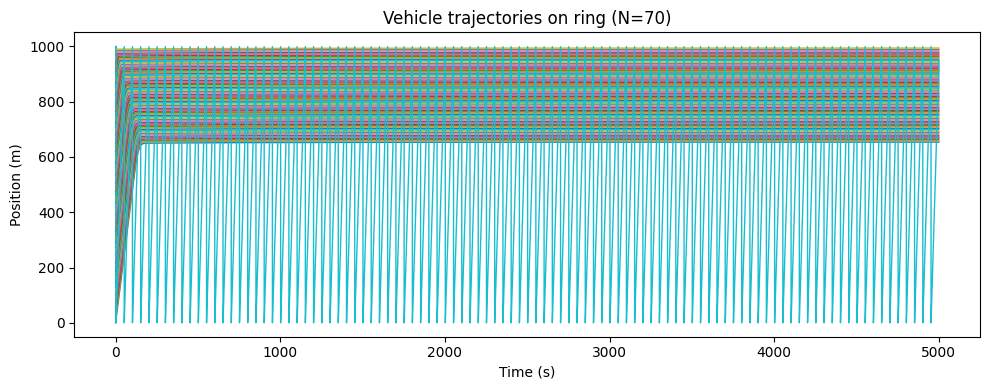

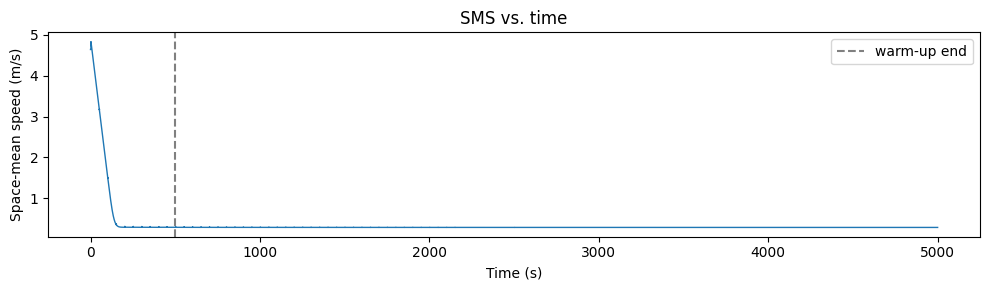

Steady SMS ≈ 0.29 m/s, density = 0.070 veh/m, flow ≈ 0.020 veh/s


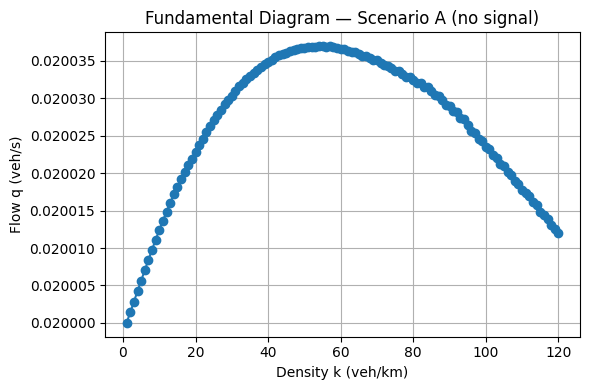

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau       = 2.0    
L_vehicle = 5.0    
dt        = 0.1   
v_f       = 20.0  

L_road   = 1000.0  
T_total  = 5000.0  
warmup   = 500.0   

def simulate(N, T=T_total):
    n_steps = int(T / dt)
    x    = np.linspace(0, L_road - L_vehicle, N)
    traj = np.zeros((n_steps, N))
    SMS  = np.zeros(n_steps)

    for t in range(n_steps):
        traj[t] = x.copy()
        x_next = np.roll(x, -1)
        gaps   = x_next - x - L_vehicle
        gaps[-1] += L_road
        gaps = np.maximum(gaps, 0.0)
        v = np.minimum(gaps / tau, v_f)
        x = (x + v * dt) % L_road
        SMS[t] = v.mean()

    return traj, SMS

def main():
    while True:
        try:
            N0 = int(input("Enter number of vehicles (1–120): "))
            if 1 <= N0 <= 120:
                break
            else:
                print("Please enter an integer between 1 and 120.")
        except ValueError:
            print("Invalid input; please enter an integer.")

    traj, SMS = simulate(N0)
    times = np.arange(len(SMS)) * dt

    plt.figure(figsize=(10, 4))
    for i in range(N0):
        plt.plot(times, traj[:, i], lw=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.title(f'Vehicle trajectories on ring (N={N0})')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    plt.plot(times, SMS, lw=1)
    plt.axvline(warmup, color='gray', ls='--', label='warm‑up end')
    plt.xlabel('Time (s)')
    plt.ylabel('Space‑mean speed (m/s)')
    plt.title('SMS vs. time')
    plt.legend()
    plt.tight_layout()
    plt.show()

    warmup_steps = int(warmup / dt)
    steady_sms   = SMS[warmup_steps:].mean()
    density0     = N0 / L_road        
    flow0        = density0 * steady_sms  
    print(f"Steady SMS ≈ {steady_sms:.2f} m/s, density = {density0:.3f} veh/m, flow ≈ {flow0:.3f} veh/s")

    Ns        = np.arange(1, 121)          
    densities = Ns / L_road              
    flows     = np.zeros_like(densities)

    for idx, N in enumerate(Ns):
        _, SMS_k = simulate(N)
        steady_sms_k = SMS_k[warmup_steps:].mean()
        flows[idx] = densities[idx] * steady_sms_k

    plt.figure(figsize=(6, 4))
    plt.plot(densities * 1000, flows, 'o-')
    plt.xlabel('Density k (veh/km)')
    plt.ylabel('Flow q (veh/s)')
    plt.title('Fundamental Diagram — Scenario A (no signal)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

**Scenario B**

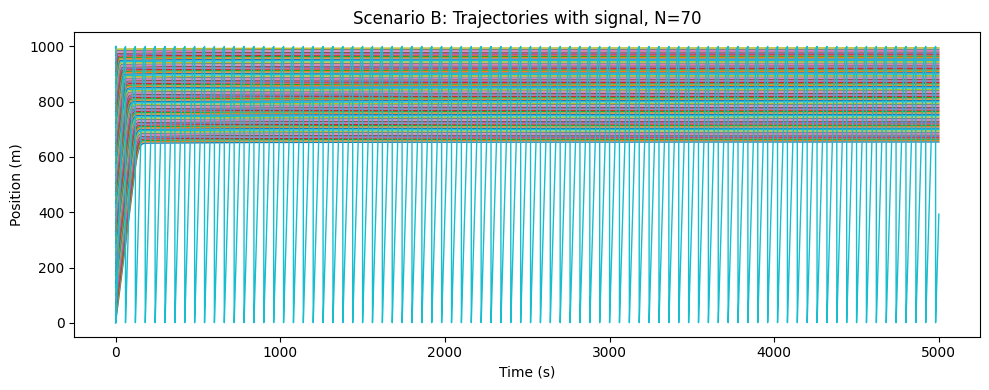

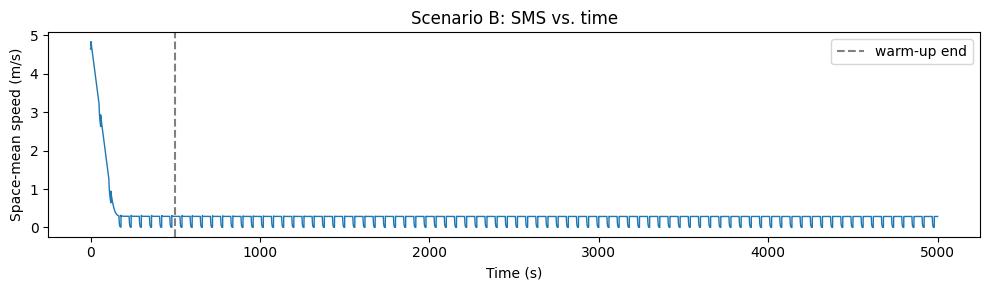

Steady SMS ≈ 0.24 m/s, density = 0.070 veh/m, flow ≈ 0.017 veh/s


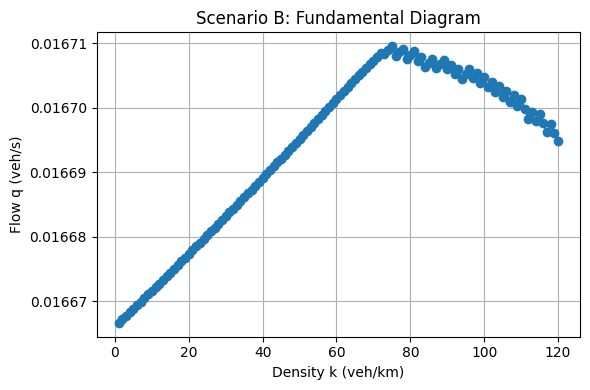

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau       = 2.0   
L_vehicle = 5.0    
dt        = 0.1    
v_f       = 20.0   

L_road   = 1000.0  
T_total  = 5000.0  
warmup   = 500.0   
T_cycle  = 60.0    
g        = 0.5    

def simulate_signal(N, T=T_total):
    n_steps = int(T / dt)
    x = np.linspace(0, L_road - L_vehicle, N)
    traj = np.zeros((n_steps, N))
    SMS  = np.zeros(n_steps)

    for t in range(n_steps):
        traj[t] = x.copy()
        phase    = (t * dt) % T_cycle
        is_green = (phase < g * T_cycle)
        x_next = np.roll(x, -1)
        gaps   = x_next - x - L_vehicle
        gaps[-1] += L_road
        gaps = np.maximum(gaps, 0.0)


        if not is_green:
            d_signal = (L_road - x - L_vehicle) % L_road
            gaps = np.minimum(gaps, d_signal)

        
        v = np.minimum(gaps / tau, v_f)
        x = (x + v * dt) % L_road
    
        SMS[t] = v.mean()

    return traj, SMS

def main():
    while True:
        try:
            N0 = int(input("Enter number of vehicles (1–120): "))
            if 1 <= N0 <= 120:
                break
            print("Please enter an integer between 1 and 120.")
        except ValueError:
            print("Invalid input; please enter an integer.")

    traj, SMS = simulate_signal(N0)
    times = np.arange(len(SMS)) * dt

    plt.figure(figsize=(10, 4))
    for i in range(N0):
        plt.plot(times, traj[:, i], lw=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.title(f'Scenario B: Trajectories with signal, N={N0}')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 3))
    plt.plot(times, SMS, lw=1)
    plt.axvline(warmup, color='gray', ls='--', label='warm‑up end')
    plt.xlabel('Time (s)')
    plt.ylabel('Space‑mean speed (m/s)')
    plt.title('Scenario B: SMS vs. time')
    plt.legend()
    plt.tight_layout()
    plt.show()

    warmup_steps = int(warmup / dt)
    steady_sms   = SMS[warmup_steps:].mean()
    density0     = N0 / L_road            
    flow0        = density0 * steady_sms  
    print(f"Steady SMS ≈ {steady_sms:.2f} m/s, density = {density0:.3f} veh/m, flow ≈ {flow0:.3f} veh/s")

    
    Ns        = np.arange(1, 121)        
    densities = Ns / L_road               
    flows     = np.zeros_like(densities)

    for idx, N in enumerate(Ns):
        _, SMS_k = simulate_signal(N)
        steady_sms_k = SMS_k[warmup_steps:].mean()
        flows[idx] = densities[idx] * steady_sms_k

    plt.figure(figsize=(6, 4))
    plt.plot(densities * 1000, flows, 'o-')
    plt.xlabel('Density k (veh/km)')
    plt.ylabel('Flow q (veh/s)')
    plt.title('Fundamental Diagram - Scenario B (0.5 green light ratio for 1 minute)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

**Scenario B - change of FD with the green light ratio**

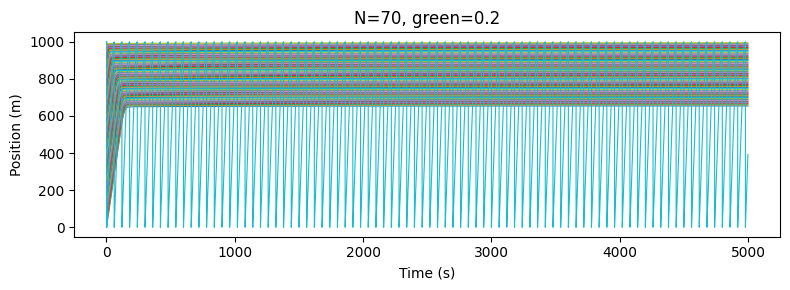

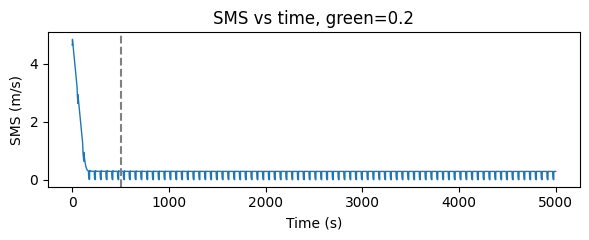

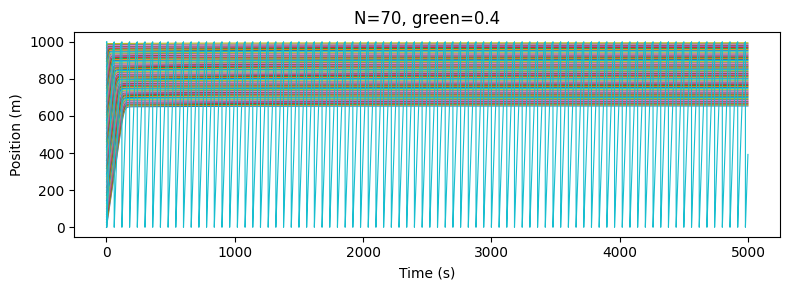

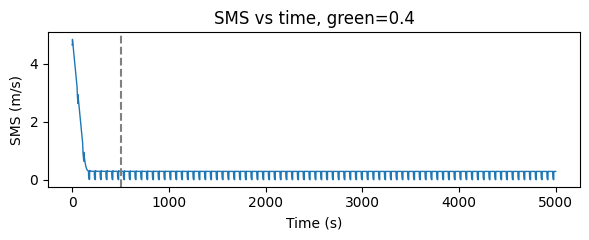

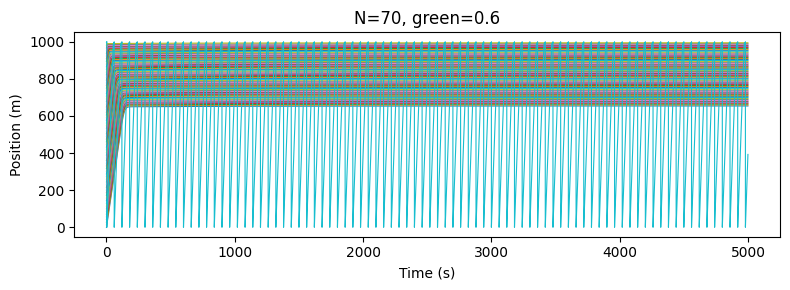

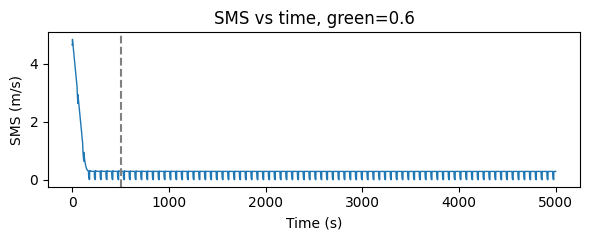

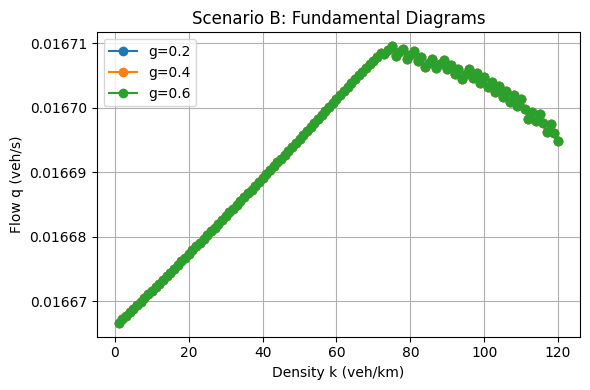

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau       = 2.0     
L_vehicle = 5.0     
dt        = 0.1    
v_f       = 20.0    

L_road   = 1000.0   
T_total  = 5000.0   
warmup   = 500.0    
T_cycle  = 60.0     

def simulate_signal(N, g, T=T_total):
    """
    Simulate N vehicles on a ring with a signal green for fraction g of each 60s cycle.
    Returns:
      traj: (n_steps × N) positions over time
      SMS:  (n_steps,)   space‑mean speeds over time
    """
    n_steps = int(T / dt)
    x       = np.linspace(0, L_road - L_vehicle, N)
    traj    = np.zeros((n_steps, N))
    SMS     = np.zeros(n_steps)

    for t in range(n_steps):
        traj[t] = x.copy()
        phase    = (t * dt) % T_cycle
        is_green = (phase < g * T_cycle)


        x_next = np.roll(x, -1)
        gaps   = x_next - x - L_vehicle
        gaps[-1] += L_road
        gaps = np.maximum(gaps, 0.0)

        
        if not is_green:
            d_signal = (L_road - x - L_vehicle) % L_road
            gaps = np.minimum(gaps, d_signal)

    
        v = np.minimum(gaps / tau, v_f)
        x = (x + v * dt) % L_road
        SMS[t] = v.mean()

    return traj, SMS

def main():
    
    while True:
        try:
            N0 = int(input("Enter number of vehicles (1–120): "))
            if 1 <= N0 <= 120:
                break
            print("Please enter an integer between 1 and 120.")
        except ValueError:
            print("Invalid input; please enter an integer.")

    green_ratios = [0.2, 0.4, 0.6]

    for g in green_ratios:
        traj, SMS = simulate_signal(N0, g)
        times = np.arange(len(SMS)) * dt

        
        plt.figure(figsize=(8, 3))
        for i in range(N0):
            plt.plot(times, traj[:, i], lw=0.8)
        plt.title(f'N={N0}, green={g:.1f}')
        plt.xlabel('Time (s)'); plt.ylabel('Position (m)')
        plt.tight_layout()
        plt.show()

        
        plt.figure(figsize=(6, 2.5))
        plt.plot(times, SMS, lw=1)
        plt.axvline(warmup, color='gray', ls='--')
        plt.title(f'SMS vs time, green={g:.1f}')
        plt.xlabel('Time (s)'); plt.ylabel('SMS (m/s)')
        plt.tight_layout()
        plt.show()

    
    Ns        = np.arange(1, 121)
    densities = Ns / L_road  

    plt.figure(figsize=(6, 4))
    for g in green_ratios:
        flows = []
        for N in Ns:
            _, SMS_k = simulate_signal(N, g)     
            steady_sms_k = SMS_k[int(warmup/dt):].mean()
            flows.append((N / L_road) * steady_sms_k)
        plt.plot(densities*1000, flows, 'o-', label=f'g={g:.1f}')

    plt.xlabel('Density k (veh/km)')
    plt.ylabel('Flow q (veh/s)')
    plt.title('Scenario B: Fundamental Diagrams')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()